(a) (2 points) Implement the distinct words function in co occurrence.py. You can do this with for
loops, but it’s more efficient to do it with Python list comprehensions.

(b) (5 points) Implement the compute co occurrence function in co occurrence.py. If you aren’t
familiar with the python numpy package, we suggest walking yourself through this tutorial: http:
//cs231n.github.io/python-numpy-tutorial.

(c) (2 points) Implement the reduce to k dim function in co occurrence.py

In [1]:
import sys
import os
import numpy as np
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

import numpy as np
import matplotlib

import matplotlib.pyplot as plt

plt.style.use('classic')
plt.rcParams['figure.figsize'] = [10, 5]

import pandas as pd


import pandas as pd
import numpy as np
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/yrybitskyi/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [2]:
corpus = ["START All that glitters isn't gold END".split(" "), 
          "START All's well that ends well END".split(" "),
         "START All that that isn't glitters END".split(" "),]
corpus

[['START', 'All', 'that', 'glitters', "isn't", 'gold', 'END'],
 ['START', "All's", 'well', 'that', 'ends', 'well', 'END'],
 ['START', 'All', 'that', 'that', "isn't", 'glitters', 'END']]

In [3]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    num_corpus_words = -1

    ### SOLUTION BEGIN
    words = set()
    for doc in corpus:
        words.update([word for word in doc])

    corpus_words = sorted(words)
    num_corpus_words = len(words)
    ### SOLUTION END

    return corpus_words, num_corpus_words

In [4]:
words, num_words = distinct_words(corpus)
word2Ind = {}
for i, word in enumerate(words):
    word2Ind[word] = i
print(word2Ind)

{'All': 0, "All's": 1, 'END': 2, 'START': 3, 'ends': 4, 'glitters': 5, 'gold': 6, "isn't": 7, 'that': 8, 'well': 9}


In [7]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters

START_TOKEN = '<START>'
END_TOKEN = '<END>'

def read_corpus(category="crude"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/yrybitskyi/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [6]:
reuters_corpus = read_corpus()

In [31]:
reuters_corpus[1][:20]

['<START>',
 'energy',
 '/',
 'u',
 '.',
 's',
 '.',
 'petrochemical',
 'industry',
 'cheap',
 'oil',
 'feedstocks',
 ',',
 'the',
 'weakened',
 'u',
 '.',
 's',
 '.',
 'dollar']

In [153]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "START All that glitters is not gold END" with window size of 4,
              "All" will co-occur with "START", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)):
                Co-occurrence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2Ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, num_words = distinct_words(corpus)
    M = None
    word2Ind = {}
    
### SOLUTION BEGIN
    word2Ind = {word: index for index, word in enumerate(words)}

    M = np.zeros((num_words, num_words))

    for sentence in corpus:
        for i, word in enumerate(sentence):
            begin = max(i - window_size, 0)
            end   = min(i + window_size, num_words)
            context = sentence[begin: end + 1]
            context.remove(sentence[i])

            current_row = word2Ind[word]
            for token in context:
                current_col = word2Ind[token]
                M[current_row, current_col] += 1

### SOLUTION END

    return M, word2Ind

In [8]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurrence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of number of corpus words)): co-occurrence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    np.random.seed(4355)
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    ### SOLUTION BEGIN
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M)
    ### SOLUTION END

    print("Done.")
    return M_reduced

In [100]:
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus[:2])
cnt = np.count_nonzero(M_co_occurrence > 0)
if np.count_nonzero(M_co_occurrence > 0) == 0:
    raise Exception("Matrix's empty")
print(f"Result Matrix Count: {cnt}")

skipped_words : []
corpus_index.shape: (2, 1001)
len(word_presence): 500
Result Matrix Count: 7692


In [108]:
min_r = 100000000
for  doc in reuters_corpus:
    if len(doc) < min_r:
        min_r = len(doc)
print(min_r)        

12


In [104]:
reuters_corpus[:2]

[['<START>',
  'japan',
  'to',
  'revise',
  'long',
  '-',
  'term',
  'energy',
  'demand',
  'downwards',
  'the',
  'ministry',
  'of',
  'international',
  'trade',
  'and',
  'industry',
  '(',
  'miti',
  ')',
  'will',
  'revise',
  'its',
  'long',
  '-',
  'term',
  'energy',
  'supply',
  '/',
  'demand',
  'outlook',
  'by',
  'august',
  'to',
  'meet',
  'a',
  'forecast',
  'downtrend',
  'in',
  'japanese',
  'energy',
  'demand',
  ',',
  'ministry',
  'officials',
  'said',
  '.',
  'miti',
  'is',
  'expected',
  'to',
  'lower',
  'the',
  'projection',
  'for',
  'primary',
  'energy',
  'supplies',
  'in',
  'the',
  'year',
  '2000',
  'to',
  '550',
  'mln',
  'kilolitres',
  '(',
  'kl',
  ')',
  'from',
  '600',
  'mln',
  ',',
  'they',
  'said',
  '.',
  'the',
  'decision',
  'follows',
  'the',
  'emergence',
  'of',
  'structural',
  'changes',
  'in',
  'japanese',
  'industry',
  'following',
  'the',
  'rise',
  'in',
  'the',
  'value',
  'of',
  'th

In [106]:
reuters_df = pd.DataFrame(reuters_corpus)
reuters_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,<START>,japan,to,revise,long,-,term,energy,demand,downwards,...,None,None,None,None,None,None,None,None,None,None
1,<START>,energy,/,u,.,s,.,petrochemical,industry,cheap,...,.,economy,continues,its,modest,rate,of,growth,.,<END>
2,<START>,turkey,calls,for,dialogue,to,solve,dispute,turkey,said,...,None,None,None,None,None,None,None,None,None,None
3,<START>,iraqi,troops,reported,pushing,back,iranians,iraq,said,today,...,None,None,None,None,None,None,None,None,None,None
4,<START>,union,texas,oil,reserves,dropped,in,1986,union,texas,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,<START>,gulf,escorts,still,under,discussion,-,weinberger,no,action,...,None,None,None,None,None,None,None,None,None,None
574,<START>,s,.,korea,may,buy,u,.,s,.,...,None,None,None,None,None,None,None,None,None,None
575,<START>,bp,oil,raises,operating,profit,&,lt,;,bp,...,None,None,None,None,None,None,None,None,None,None
576,<START>,wall,street,stocks,/,u,.,s,.,oil,...,None,None,None,None,None,None,None,None,None,None


In [107]:
reuters_df.to_csv('reuters_data.csv')

In [101]:
len(M_co_occurrence)

500

In [102]:
word_M = [ [ None for y in range( len(word2Ind_co_occurrence) + 1) ] 
             for x in range( len(word2Ind_co_occurrence) + 1)] 

ind2Word_co_occurrence = [0 for x in range(len(word2Ind_co_occurrence))] 
for t in word2Ind_co_occurrence.items():
    word = t[0]
    idx = t[1]
    ind2Word_co_occurrence[idx] = word


df = pd.DataFrame()
for i in range(len(word2Ind_co_occurrence)):
    record = {}
    for j in range(len(word2Ind_co_occurrence)):
        record['#'] = ind2Word_co_occurrence[i]
        record[ind2Word_co_occurrence[j]] = int(M_co_occurrence[i, j])
    df = df.append(record, ignore_index=True)        
df

,"""",#,&,',(,),"),",",",",""",-,...,with,witter,wood,work,world,worry,would,year,years,yen
0,0.0,"""",1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,&,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,',0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,(,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,),0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,worry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,would,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
497,0.0,year,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
498,0.0,years,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
df.to_csv("11.csv")

In [10]:
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)
print(M_reduced_co_occurrence.size)

Running Truncated SVD over 888 words...
Done.
1776


In [11]:
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting

In [24]:
def plot_embeddings(M_reduced, word2Ind, words, title):
    plt.clf()
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    for word in words:
        idx = word2Ind[word]
        x = M_reduced[idx, 0]
        y = M_reduced[idx, 1]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x, y, word, fontsize=9)
    

<Figure size 800x400 with 0 Axes>

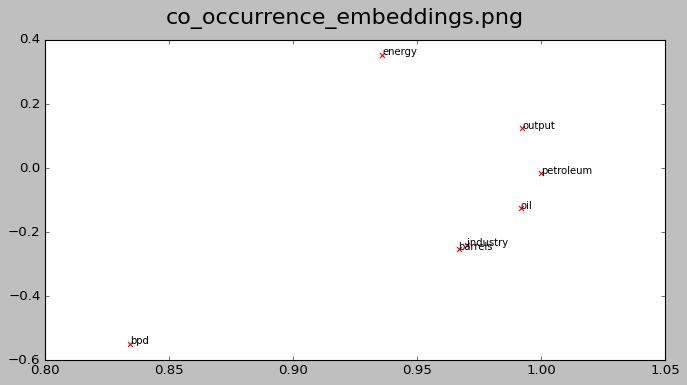

In [26]:
# words_list = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
words_list = ['barrels', 'bpd', 'energy', 'industry', 'oil', 'output', 'petroleum']

plot_embeddings(M_normalized, word2Ind_co_occurrence, words_list, 'co_occurrence_embeddings.png')

In [90]:
word2Ind = {'All': 0, "All's": 1, 'END': 2, 'START': 3, 'ends': 4, 'glitters': 5, 'gold': 6, "isn't": 7, 'that': 8, 'well': 9}

ind2Word = [0 for x in range(len(word2Ind))] 
for t in word2Ind.items():
    word = t[0]
    idx = t[1]
    ind2Word[idx] = word
    

M = np.array(
[[0., 0., 1., 2., 0., 1., 0., 0., 2., 0.,],
 [0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
 [1., 0., 0., 0., 1., 0., 1., 1., 1., 1.],
 [2., 1., 0., 0., 0., 0., 0., 0., 2., 1.],
 [0., 0., 1., 0., 0., 0., 0., 0., 1., 2.],
 [1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
 [0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
 [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
 [2., 1., 1., 2., 1., 1., 0., 1., 0., 2.],
 [0., 1., 1., 1., 2., 0., 0., 0., 2., 0.]]
)


word_M = [ [ None for y in range( len(word2Ind) + 1) ] 
             for x in range( len(word2Ind) + 1)] 
df = pd.DataFrame()
for i in range(len(word2Ind)):
    record = {}
    for j in range(len(word2Ind)):
        record['#'] = ind2Word[i]
        record[ind2Word[j]] = int(M[i, j])
    df = df.append(record, ignore_index=True)        
df    


# "START All that glitters isn't gold END".split(" "),
# "START All's well that ends well END".split(" "),
# "START that All END".split(" "),



,#,All,All's,END,START,ends,glitters,gold,isn't,that,well
0,All,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0
1,All's,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,END,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3,START,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,ends,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
5,glitters,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
6,gold,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,isn't,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,that,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,2.0
9,well,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0


In [111]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

In [132]:
def word_context(doc, word_index, wd_size):
    word_context_map = {}
    print(f"aaa {doc[word_index]}")
    if np.isnan(doc[word_index]):
        return {}

    left_context = doc[relu(word_index - wd_size) : word_index]
    right_context = doc[word_index + 1 : word_index + wd_size + 1]

    for w in left_context:
        if np.isnan(w):
            break
        cnt = word_context_map.get(w, 0)
        word_context_map[w] = cnt + 1
    for w in right_context:
        if np.isnan(w):
            break
        cnt = word_context_map.get(w, 0)
        word_context_map[w] = cnt + 1

    return word_context_map


In [146]:
doc = np.array([1, 2, 2, 2, 3, 4, 5, 6, np.nan])
print(word_context(doc, 5, 4))

aaa 4.0
{2.0: 3, 3.0: 1, 5.0: 1, 6.0: 1}


In [136]:
arr = ['a', 'b', 'c', 'd']

In [142]:
arr[2:1]

[]

In [140]:
arr[1:6]

['b', 'c', 'd']

In [147]:
import numpy as np
np.random.seed(3) # for reproducibility

# Generate data: 5 labels, 10 examples, binary.
label_headers = 'Alice Bob Carol Dave Eve'.split(' ')
label_data = np.random.randint(0,2,(10,5)) # binary here but could be any integer.
print('labels:\n{0}'.format(label_data))

# Compute cooccurrence matrix 
cooccurrence_matrix = np.dot(label_data.transpose(),label_data)
print('\ncooccurrence_matrix:\n{0}'.format(cooccurrence_matrix)) 

# Compute cooccurrence matrix in percentage
# FYI: http://stackoverflow.com/questions/19602187/numpy-divide-each-row-by-a-vector-element
#      http://stackoverflow.com/questions/26248654/numpy-return-0-with-divide-by-zero/32106804#32106804
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
with np.errstate(divide='ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))

labels:
[[0 0 1 1 0]
 [0 0 1 1 1]
 [0 1 1 1 0]
 [1 1 0 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 1 1]
 [0 1 0 0 1]
 [1 0 0 1 0]
 [1 0 1 1 1]]

cooccurrence_matrix:
[[3 1 1 2 1]
 [1 6 2 2 2]
 [1 2 5 4 2]
 [2 2 4 6 3]
 [1 2 2 3 4]]

cooccurrence_matrix_percentage:
[[1.         0.33333333 0.33333333 0.66666667 0.33333333]
 [0.16666667 1.         0.33333333 0.33333333 0.33333333]
 [0.2        0.4        1.         0.8        0.4       ]
 [0.33333333 0.33333333 0.66666667 1.         0.5       ]
 [0.25       0.5        0.5        0.75       1.        ]]


In [151]:
# https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn
import collections

def co_occurrence(sentences, window_size):
    d = collections.defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        text = text.lower().split()
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1

    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    
    print(vocab)

    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

text = ["I go to school every day by bus .",
        "i go to theatre every night by bus"]
df = co_occurrence(text, 2)
df

['.', 'bus', 'by', 'day', 'every', 'go', 'i', 'night', 'school', 'theatre', 'to']


,.,bus,by,day,every,go,i,night,school,theatre,to
.,0,1,1,0,0,0,0,0,0,0,0
bus,1,0,2,1,0,0,0,1,0,0,0
by,1,2,0,1,2,0,0,1,0,0,0
day,0,1,1,0,1,0,0,0,1,0,0
every,0,0,2,1,0,0,0,1,1,1,2
go,0,0,0,0,0,0,2,0,1,1,2
i,0,0,0,0,0,2,0,0,0,0,2
night,0,1,1,0,1,0,0,0,0,1,0
school,0,0,0,1,1,1,0,0,0,0,1
theatre,0,0,0,0,1,1,0,1,0,0,1


In [2]:
def compute_co_occurrence_matrix(corpus, window_size=4):

    distinct_words = sorted(list(set([word for sentence in corpus for word in sentence])))
    num_words = len(distinct_words)
    word2Ind = {word: index for index, word in enumerate(distinct_words)}
    
    M = np.zeros((num_words, num_words))
    
    for sentence in corpus:
        for i, word in enumerate(sentence):        
            begin = max(i - window_size, 0)
            end   = min(i + window_size, num_words)
            context = sentence[begin: end + 1]
            context.remove(sentence[i])
            
            current_row = word2Ind[word]
            for token in context:
                current_col = word2Ind[token]
                M[current_row, current_col] += 1

    return M, word2Ind


https://aegis4048.github.io/understanding_multi-dimensionality_in_vector_space_modeling

In [3]:
data = []
for fileid in reuters.fileids():
    category = reuters.categories(fileid)
    text = reuters.raw(fileid)
    data.append([fileid, category, text])
df_reuters = pd.DataFrame(data, columns=['File ID', 'Category', 'Text'])

In [4]:
df_reuters.head(10)

,File ID,Category,Text
0,test/14826,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...
1,test/14828,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
2,test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
3,test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...
4,test/14833,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...
5,test/14839,[ship],AUSTRALIAN FOREIGN SHIP BAN ENDS BUT NSW PORTS...
6,test/14840,"[coffee, lumber, palm-oil, rubber, veg-oil]",INDONESIAN COMMODITY EXCHANGE MAY EXPAND\n Th...
7,test/14841,"[grain, wheat]",SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE\n...
8,test/14842,[gold],WESTERN MINING TO OPEN NEW GOLD MINE IN AUSTRA...
9,test/14843,[acq],SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERG...


In [5]:
df_crude = df_reuters[df_reuters['Category'].apply(lambda x: 'crude' in x)]
df_crude.head(10)

,File ID,Category,Text
2,test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
123,test/15063,"[acq, crude, earn, pet-chem]",ENERGY/U.S. PETROCHEMICAL INDUSTRY\n Cheap oi...
187,test/15200,[crude],TURKEY CALLS FOR DIALOGUE TO SOLVE DISPUTE\n ...
205,test/15230,[crude],IRAQI TROOPS REPORTED PUSHING BACK IRANIANS\n ...
209,test/15238,"[crude, earn]",UNION TEXAS OIL RESERVES DROPPED IN 1986\n Un...
214,test/15244,[crude],GHANA TO BUY CRUDE OIL FROM IRAN\n Ghana will...
257,test/15322,"[crude, nat-gas]",U.S.SENATE LIFTS SOME BANS ON NATURAL GAS\n T...
266,test/15339,"[crude, gas]","EIA SAYS DISTILLATE STOCKS UNCHANGED, GASOLINE..."
268,test/15344,"[crude, gas]",EIA SAYS DISTILLATE STOCKS UNCHANGED IN WEEK\n...
272,test/15351,"[crude, gas]",RECENT U.S. OIL DEMAND OFF 2.6 PCT FROM YEAR A...


In [8]:
reuters_corpus = read_corpus('crude')
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus, window_size=5)

In [9]:
pd.DataFrame(M_co_occurrence, index=word2Ind_co_occurrence.keys(), columns=word2Ind_co_occurrence.keys()).head(10)

,"""","""(",""",","""...",$,&,',(,),")""",...,zinc,zoete,zollinger,zone,zones,zubedei,zubeidi,zuheir,zulia,zverev
"""",88.0,0.0,1.0,0.0,1.0,2.0,78.0,17.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""(",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
""",",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&,2.0,0.0,0.0,0.0,0.0,12.0,31.0,8.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
',78.0,0.0,0.0,0.0,0.0,31.0,22.0,8.0,5.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
(,17.0,0.0,0.0,0.0,0.0,8.0,8.0,6.0,220.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
),7.0,1.0,0.0,0.0,0.0,4.0,5.0,220.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
")""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def reduce_to_k_dim(M, n_components=2):
    
    svd = TruncatedSVD(n_components=n_components, n_iter=10, random_state=42)
    M_reduced = svd.fit_transform(M_co_occurrence)  
    
    print('n_components =', n_components)
    print('Explained Variance =', round(svd.explained_variance_ratio_.sum(), 3))
    
    return M_reduced

In [11]:
M_reduced_2 = reduce_to_k_dim(M_co_occurrence, n_components=2)

n_components = 2
Explained Variance = 0.906


In [12]:
M_lengths_2 = np.linalg.norm(M_reduced_2, axis=1)
M_normalized_2 = M_reduced_2 / M_lengths_2[:, np.newaxis]

In [13]:
M_reduced_3 = reduce_to_k_dim(M_co_occurrence, n_components=3)

n_components = 3
Explained Variance = 0.923


In [14]:
M_lengths_3 = np.linalg.norm(M_reduced_3, axis=1)
M_normalized_3 = M_reduced_3 / M_lengths_3[:, np.newaxis]

In [15]:
# Axes3D needs to be imported in case of plotting 3D visualizations

from mpl_toolkits.mplot3d import Axes3D

def plot_embeddings(M_reduced, word2Ind, words, ax):
    
    dimension = M_reduced.shape[1]
    
    assert(dimension == 3 or dimension == 2)
    
    for i, word in enumerate(words):
        index = word2Ind[word]
        embedding = M_reduced[index]
        
        if dimension == 3:            
            x, y, z = embedding[0], embedding[1], embedding[2]
            ax.scatter(x, y, z, color='red')
            ax.text(x, y, z, word)
        else:
            x, y = embedding[0], embedding[1]
            ax.scatter(x, y, marker='x', color='red')
            ax.text(x, y,  word)   
    return fig, ax

In [16]:
words = ['bank', 'barrels', 'bpd', 'ecuador', 'energy', 'industry', 'oil', 'petroleum', 'output', 'produce', 'occidental',
         'mobil', 'exxon', 'electricity' ,'kilowatt', 'china', 'paris', 'saudi', 'norway', 'blockading', 'expert', 'yen', 
         'kuwaiti', 'kuwait', 'persian', 'eia',  'gulf', 'bp', 'uk', 'gas', 'europe', 'allocated', 'lacks', 'militarily', 
         'discouraged', 'violations', 'possibly']

<IPython.core.display.Javascript object>


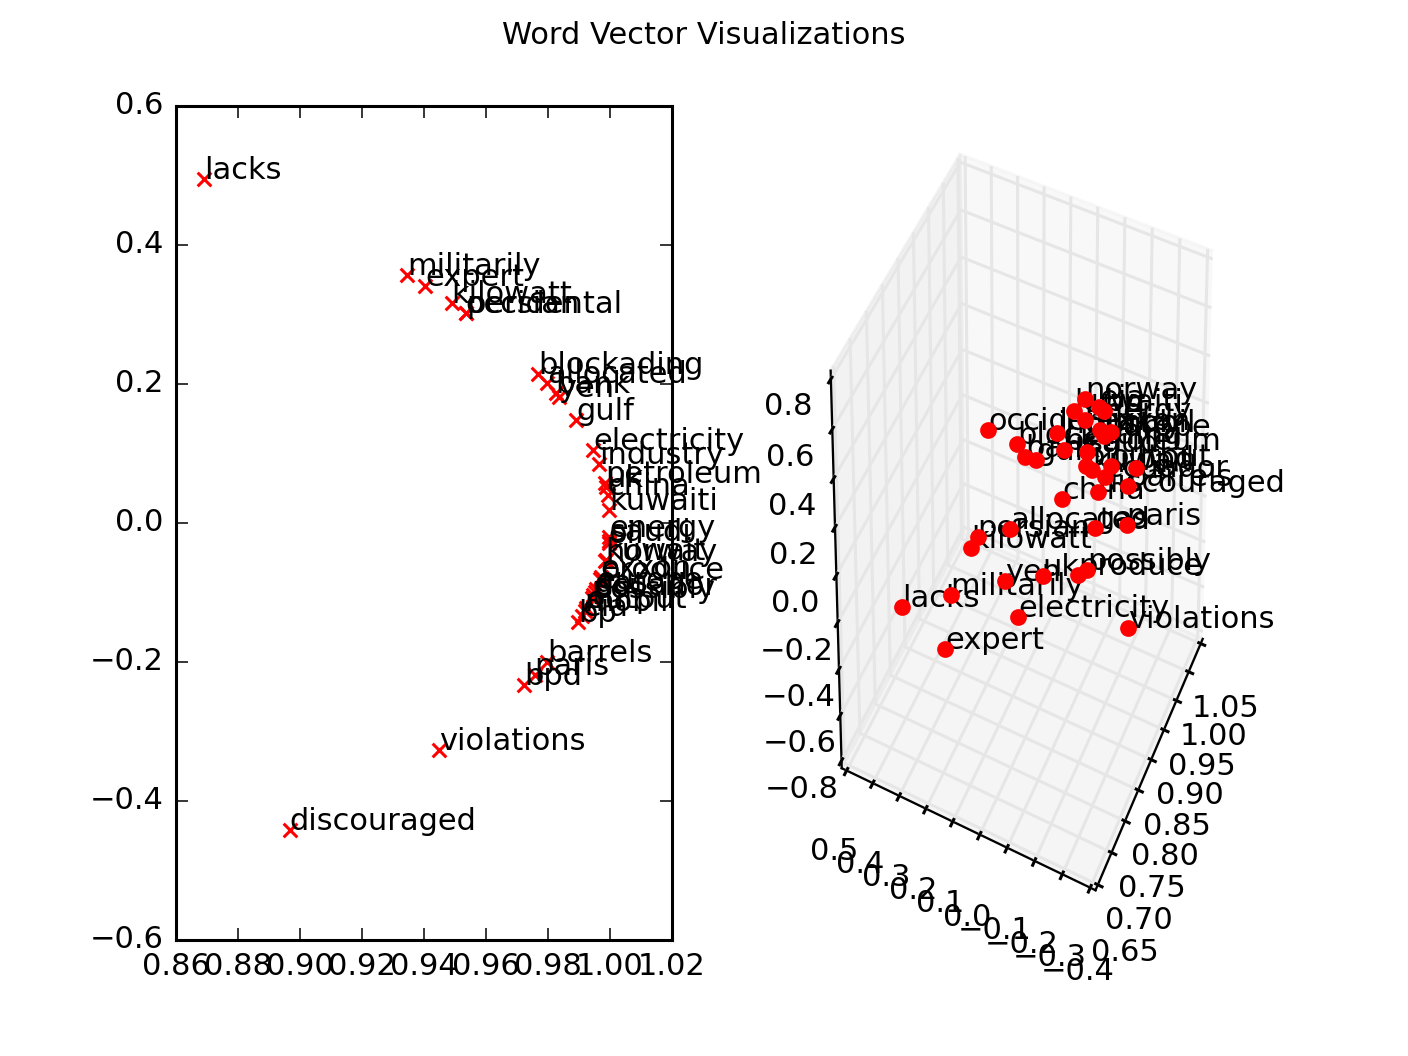

In [17]:
fig = plt.figure()
fig.suptitle('Word Vector Visualizations')

# First subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1 = plot_embeddings(M_normalized_2, word2Ind_co_occurrence, words, ax1)


# Second subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2 = plot_embeddings(M_normalized_3, word2Ind_co_occurrence, words, ax2)